In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
caracteristiques = pd.read_csv('caracteristiques-2021.csv', sep=';')
vehicules = pd.read_csv('vehicules-2021.csv', sep=';')
usagers = pd.read_csv('usagers-2021.csv', sep=';')

**Question 1: Top 3 common vehicles**

In [3]:
catv = {
    0: 'Indéterminable',
    1: 'Bicyclette', 2: 'Cyclomoteur <50cm3',
    3: 'Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")',
    4: 'Référence inutilisée depuis 2006 (scooter immatriculé)',
    5: 'Référence inutilisée depuis 2006 (motocyclette)',
    6: 'Référence inutilisée depuis 2006 (side-car)',
    7: 'VL seul',
    8: 'Référence inutilisée depuis 2006 (VL + caravane)',
    9: 'Référence inutilisée depuis 2006 (VL + remorque)',
    10: 'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque \
    (anciennement VU seul 1,5T <= PTAC <= 3,5T)',
    11: 'Référence inutilisée depuis 2006 (VU (10) + caravane)',
    12: 'Référence inutilisée depuis 2006 (VU (10) + remorque)',
    13: 'PL seul 3,5T <PTCA <= 7,5T',
    14: 'PL seul > 7,5T',
    15: 'PL > 3,5T + remorque',
    16: 'Tracteur routier seul',
    17: 'Tracteur routier + semi-remorque',
    18: 'Référence inutilisée depuis 2006 (transport en commun)',
    19: 'Référence inutilisée depuis 2006 (tramway)',
    20: 'Engin spécial',
    21: 'Tracteur agricole',
    30: 'Scooter < 50 cm3',
    31: 'Motocyclette > 50 cm3 et <= 125 cm3',
    32: 'Scooter > 50 cm3 et <= 125 cm3',
    33: 'Motocyclette > 125 cm3',
    34: 'Scooter > 125 cm3',
    35: 'Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)',
    36: 'Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)',
    37: 'Autobus',
    38: 'Autocar',
    39: 'Train',
    40: 'Tramway',
    41: '3RM <= 50 cm3',
    42: '3RM > 50 cm3 <= 125 cm3',
    43: '3RM > 125 cm3',
    50: 'EDP à moteur',
    60: 'EDP sans moteur',
    80: 'VAE',
    99: 'Autre véhicule'
}

In [4]:
data = (
    vehicules
    .value_counts('catv', sort=True)
    .iloc[:3]
    .reset_index()
    .rename(columns={0: 'n_accidents'}))
data.catv = data.catv.map(catv)
data

,catv,n_accidents
0,VL seul,57101
1,Motocyclette > 125 cm3,7510
2,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",6745


**Question 2: Graph recreation**

In [5]:
# Creating the week column
caracteristiques['week'] = (
    caracteristiques
    .apply(lambda row: date(row['an'], row['mois'], row['jour']).strftime("%V"), axis=1)
    .astype(int))

# Mapping labels to lum values
caracteristiques.lum = caracteristiques.lum.map({
    1: 'Daylight',
    2: 'Dawn/Dush',
    3: 'Night without street lights',
    4: 'Night with stree lights off',
    5: 'Night with stree lights on'})

# Prepare the data for the plot
data = (caracteristiques
        .groupby(['week', 'lum'])
        .size()
        .reset_index()
        .pivot_table(values=0, index='week', columns='lum'))

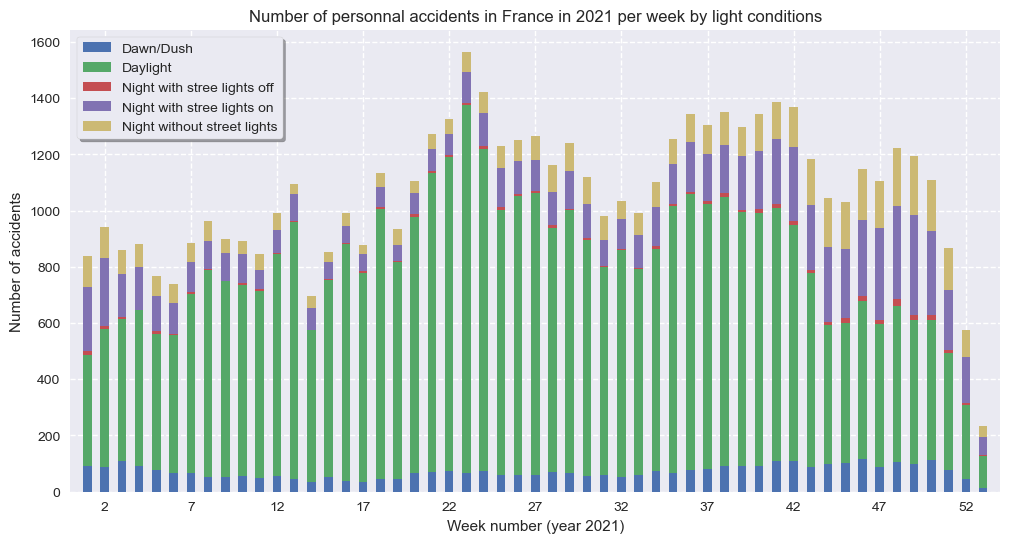

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

data.plot(kind='bar', stacked=True, ax=ax)

plt.xlim([-1, 53])
plt.xlabel('Week number (year 2021)')
plt.ylabel('Number of accidents')
plt.title('Number of personnal accidents in France in 2021 per week by light conditions')
plt.tick_params(grid_linestyle='--')
plt.xticks(list(range(1, 53, 5)), rotation=0)
plt.legend(frameon=True, shadow=True)
plt.show()

**Question 3: Accidents localizations**

In [7]:
caracteristiques.lat = caracteristiques.lat.str.replace(',', '.').astype(float)
caracteristiques.long = caracteristiques.long.str.replace(',', '.').astype(float)

mainland = 'lat >= 41 & lat <= 51.7 & long >= -5.8 & long <= 10.3'
data_1 = caracteristiques.query(mainland)
data_2 = pd.merge(data_1, usagers, on='Num_Acc')
data_2 = data_2.query('grav==2')

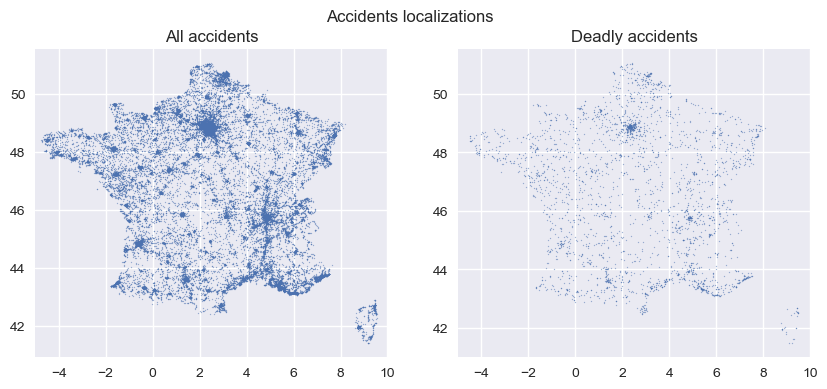

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data_1.long, data_1.lat, s=2, marker='.', alpha=.4)
plt.gca().set_xlim([-5, 10])
plt.title('All accidents')

plt.subplot(1, 2, 2)
plt.scatter(data_2.long, data_2.lat, s=2, marker='.', alpha=.4)
plt.gca().set_xlim([-5, 10])
plt.title('Deadly accidents')

plt.suptitle('Accidents localizations')

plt.show()